<a href="https://colab.research.google.com/github/aburameshotaro/AlgorytmGenetycznyWiertarka/blob/main/AlgorytmGenetyczny_wiertarka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algorytm genetyczny Wiertarka



Celem algorytmu jest odnalezienie jak najkrótszej drogi przez wszystkie punkty na tablicy i powrócenie do punktu początkowego. W prezentowanym rozwiązaniu wykorzystano algorytm genetyczny.

Zaimportowanie potrzebnych bibliotek

In [ ]:
import random
import time
import matplotlib.pyplot as plt

Ustalenie podstawowych ustawień algorytmu

In [ ]:
POPULATION_SIZE = 400
BOARD_SIZE = (20, 20)
GENES = [i for i in range(BOARD_SIZE[0] * BOARD_SIZE[1])]
ITERATIONS = 500

Implementacja algorytmów genetycznych

In [ ]:
class Individual(object):
    '''
    Class representing individual in population
    '''
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()
 
    def mutate(self):
        '''
        create random genes for mutation
        '''
        gene1 = random.choice(range(len(GENES)))
        gene2 = random.choice(range(len(GENES)))
        new_chromosome = self.chromosome.copy()
        new_chromosome[gene1], new_chromosome[gene2] = new_chromosome[gene2], new_chromosome[gene1]
        return new_chromosome
 
    @classmethod
    def create_gnome(self):
        '''
        create chromosome or string of genes
        '''
        gnome = GENES.copy()
        random.shuffle(gnome)
        return gnome 
 
    def mate(self, par2):
        '''
        Perform mating and produce new offspring
        '''
 
        # chromosome for offspring
        child_chromosome = [None for _ in range(len(GENES))]

        beginning = random.randint(0, len(GENES))

        genes_from_parent1 = self.chromosome[beginning:].copy()
        where_to_put_genes_parent1 = random.randint(0, len(GENES))
        for i in range(len(genes_from_parent1)):
          child_chromosome[(where_to_put_genes_parent1 + i)% len(GENES) ] = genes_from_parent1[i]

        for gen in par2.chromosome:
          if gen not in genes_from_parent1:
            for i in range(len(child_chromosome)):
              if child_chromosome[i] is None:
                child_chromosome[i] = gen
                break

        # create new Individual(offspring) using
        # generated chromosome for offspring
        return Individual(child_chromosome)
 
    def cal_fitness(self):
        '''
        Calculate fitness score, it is the number of
        characters in string which differ from target
        string.
        '''
        fitness = 0
        full_cycle = self.chromosome.copy()
        full_cycle.append(self.chromosome[0])
        prev_gen = full_cycle[0]
        for gen in full_cycle:
            fitness += ( ( prev_gen % BOARD_SIZE[0] - gen % BOARD_SIZE[0] )**2 + ( prev_gen // BOARD_SIZE[0] - gen // BOARD_SIZE[0] )**2 ) ** 0.5
            prev_gen = gen
        return fitness

Tworzenie populacji początkowej

In [ ]:
generation = 1
population = []
population.append(Individual(GENES))
population.append(Individual(GENES))
for _ in range(POPULATION_SIZE - 2):
    gnome = Individual.create_gnome()
    population.append(Individual(gnome))

Tworzenie kolejnych populacji

In [ ]:
generation_outcomes = []
start = time.perf_counter()
for i in range(ITERATIONS):
    # sort the population in increasing order of fitness score
    population = sorted(population, key = lambda x:x.fitness)
 
 
    # Otherwise generate new offsprings for new generation
    new_generation = []
 
    # Perform Elitism, that mean 10% of fittest population
    # goes to the next generation
    s = int((50*POPULATION_SIZE)/100)
    new_generation.extend(population[:s])

    for person in new_generation:
      person.mutate()

    for j in range(s):
        parent1 = random.choice(population[:50])
        parent2 = random.choice(population[:50])
        child = parent1.mate(parent2)
        new_generation.append(child)


    new_generation = sorted(new_generation, key = lambda x:x.fitness)

    for j in range(s):
        new_generation[j+s] = Individual(new_generation[j].mutate())

    population = new_generation
    generation_outcomes.append((i,population[0].chromosome,population[0].fitness))
    print("Generation: {}\tString: {}\tFitness: {}".\
              format(i,
              population[0].chromosome,
              population[0].fitness))
stop = time.perf_counter()
print(f"Execution of the algorithm: {stop-start:0.4f} seconds")

Rysowanie wykresu

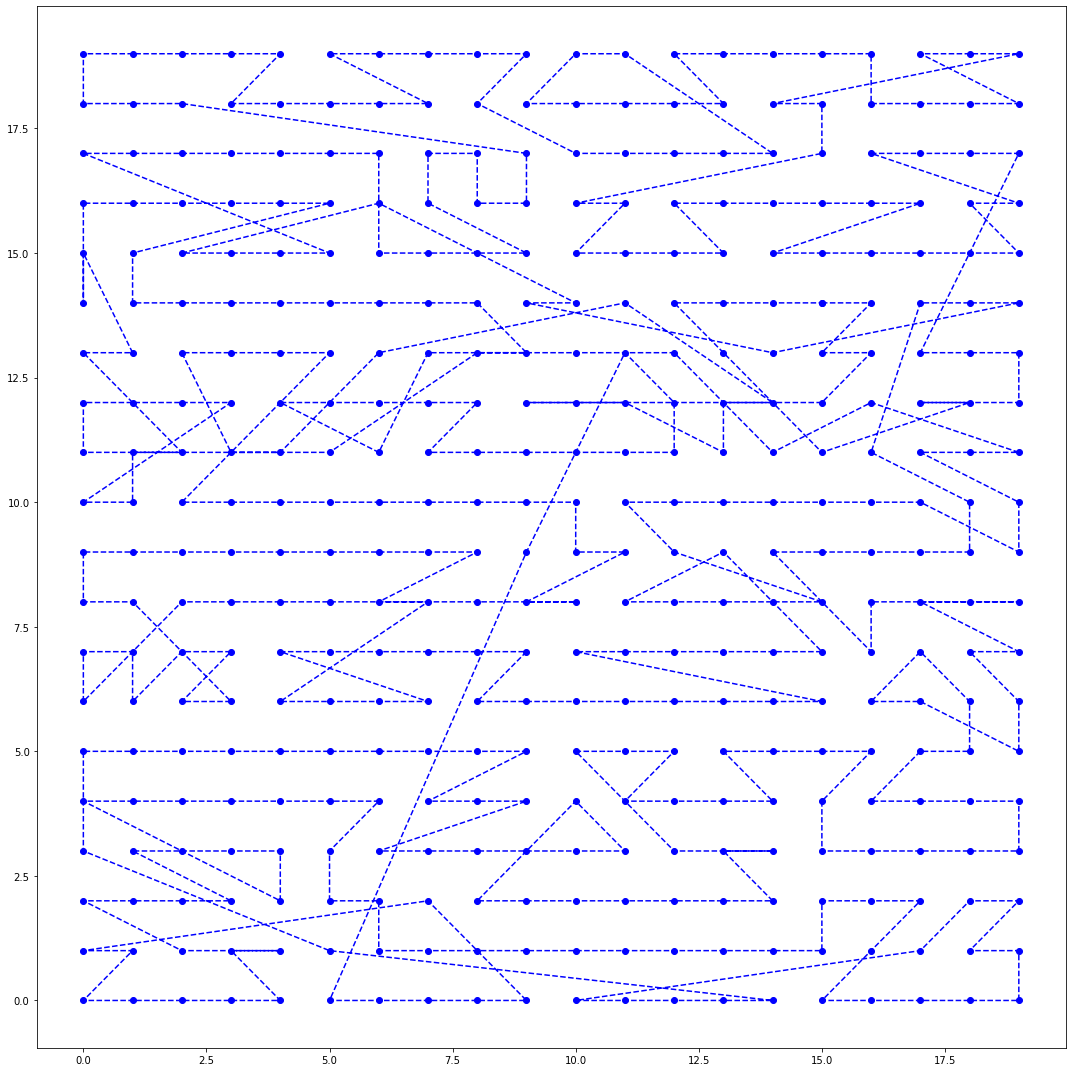

In [ ]:
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True

x_values = []
y_values = []

full_cycle = generation_outcomes[-1][1].copy()
full_cycle.append(generation_outcomes[-1][1][0])
prev_gen = full_cycle[0]
for gen in full_cycle:
  x_values.append(gen % BOARD_SIZE[0])
  y_values.append(gen // BOARD_SIZE[0])


plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.show()